In [1]:
import sys
sys.path.append("../code")


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from scipy import optimize

from scipy.io import savemat

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)

from sklearn.datasets import make_moons


def print_stats(X):
    print('size: ', X.shape)
    print('Mean:', np.mean(X))
    print('Max: ', np.max(X))
    print('Min: ', np.min(X))
    print('STD: ', np.std(X))
    
    return
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
with open('data/PubMedBERT_embeddings_float16.npy', 'rb') as f:
    data = np.load(f)

In [3]:
print(data.shape)

N,m = data.shape

(20687150, 768)


In [4]:
import pandas as pd
data_pd = pd.read_csv('data/pubmed_landscape_data.csv')

data_top = data_pd.head()
data_top

,Title,Journal,PMID,Year,x,y,Labels,Colors
0,Reflections on the special senses in relation ...,Journal of the American Psychoanalytic Associa...,1133452,1975.0,25.885,-156.884,unlabeled,#D3D3D3
1,Tracing a memory.,Journal of the American Psychoanalytic Associa...,1133453,1975.0,55.512,-170.332,unlabeled,#D3D3D3
2,Some pitfalls in the assessment of analyzabili...,Journal of the American Psychoanalytic Associa...,1133454,1975.0,51.245,-166.751,unlabeled,#D3D3D3
3,"Variability of the iron, copper and mercury co...",The journal of histochemistry and cytochemistr...,1133455,1975.0,-44.121,32.264,unlabeled,#D3D3D3
4,"Hypophysectomy of the tammar wallaby, Macropus...",The Journal of endocrinology,1133526,1975.0,-7.015,70.530,unlabeled,#D3D3D3


In [5]:
Z_l  = data_pd['Labels'] 
labeled_indexes = np.where(Z_l != 'unlabeled')[0]

print(len(labeled_indexes))
print(labeled_indexes)

7123706
[      18       19       20 ... 20687134 20687138 20687139]


In [6]:
sample_number = 300000

rng = np.random.default_rng(245254)
idxs = np.random.permutation(labeled_indexes)[:sample_number]


X_train = data[idxs].astype(np.float32)

print_stats(X_train)

size:  (300000, 768)
Mean: -0.022558758
Max:  1.2109375
Min:  -14.109375
STD:  0.5273222


In [7]:
from PIL import ImageColor

Z = data_pd['Colors'].to_numpy()

z_train = Z[idxs]

print(np.unique(z_train))

c_train = []
for zhex in z_train:
    if zhex == '#00000':
        zhex = '#000000'
    zrgb = ImageColor.getcolor(zhex, "RGB")
    c_train.append(zrgb)
    
c_train = np.array(c_train)/255.0

['#00000' '#0000A6' '#004D43' '#006FA6' '#008941' '#0089A3' '#009271'
 '#00C2A0' '#00FECF' '#1B4400' '#1CE6FF' '#3B5DFF' '#4FC601' '#549E79'
 '#5A0007' '#5B4534' '#6508ba' '#6B002C' '#6F0062' '#7A4900' '#8FB0FF'
 '#A4E804' '#B79762' '#BA0900' '#BC23FF' '#C20078' '#C895C5' '#CC0744'
 '#D790FF' '#E83000' '#FF2F80' '#FF34FF' '#FF4A46' '#FF90C9' '#FF9408'
 '#FFB500' '#aeaa00' '#b65141']


In [ ]:
from umap import UMAP

ump = UMAP(n_components=2,
           min_dist=0.1,
           init='spectral',
           random_state=222)

y_umap = ump.fit_transform(X_train)



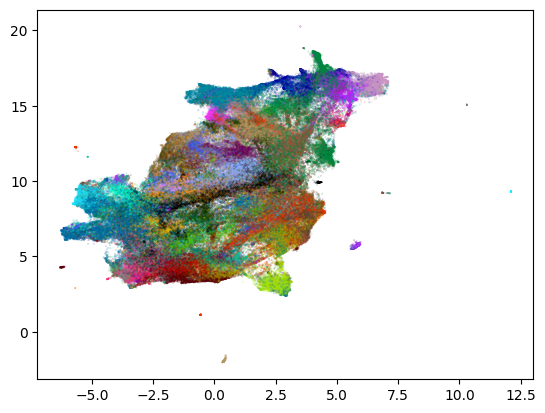

In [15]:
plt.figure()
plt.scatter(y_umap[:,0], y_umap[:,1], s=0.01, c=c_train)

In [ ]:
from umap import UMAP

ump_md = UMAP(n_components=2,
            min_dist=0.0001,
            init='spectral',
            random_state=222)

y_ump_md = ump_md.fit_transform(X_train)



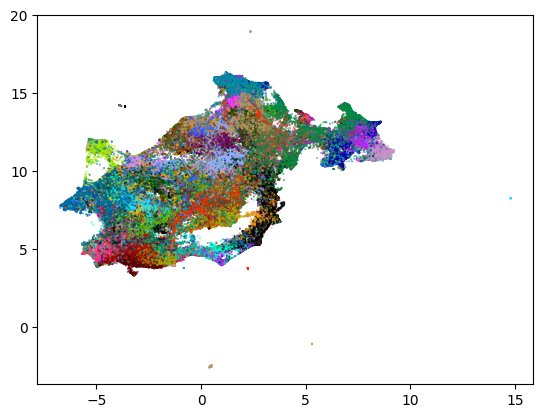

In [10]:
plt.figure()
plt.scatter(y_ump_md[:,0], y_ump_md[:,1], s=0.1, c=c_train)

In [ ]:
from umap import UMAP

ump_2 = UMAP(n_components=2,
            a=1.57,
            b=0.6,
            init='spectral',
            random_state=222)

y_umap_2 = ump_2.fit_transform(X_train)



In [ ]:
plt.figure()
plt.scatter(y_umap_2[:,0], y_umap_2[:,1], s=0.1, c=c_train)

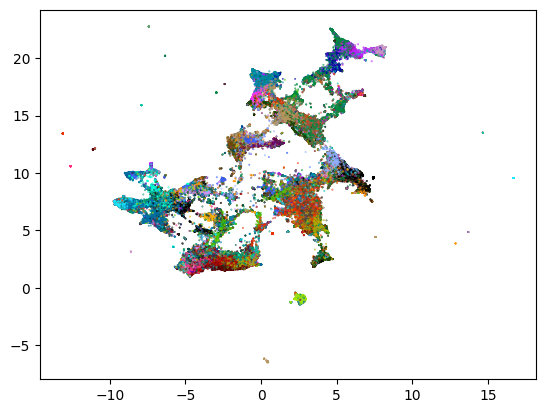

In [17]:
plt.figure()
plt.scatter(y_umap_2[:,0], y_umap_2[:,1], s=0.1, c=c_train)

In [26]:
from umap import UMAP

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
init = pca.fit_transform(X_train)

ump_pca = UMAP(n_components=2,
            a=1.57,
            b=0.6,
            init=init,
            random_state=222)

y_umap_pca_6 = ump_pca.fit_transform(X_train)



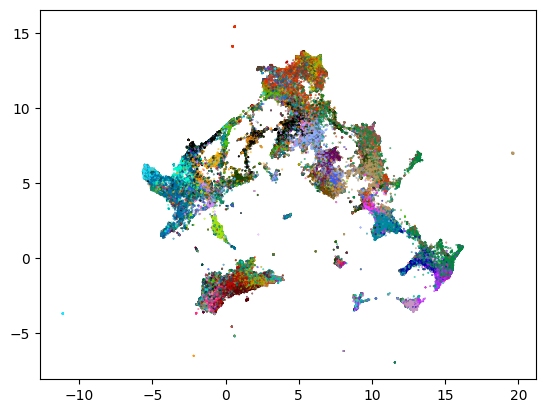

In [27]:
plt.figure()
plt.scatter(y_umap_pca_6[:,0], y_umap_pca_6[:,1], s=0.1, c=c_train)

<h1>t-SNE</h1>

In [29]:
from openTSNE import TSNEEmbedding
from openTSNE import affinity
from openTSNE import initialization

affinities_train = affinity.PerplexityBasedNN(
    X_train,
    perplexity=5,
    metric="euclidean",
    random_state=121,
    verbose=True,
)

init_train = initialization.pca(X_train, random_state=42)

embedding_train = TSNEEmbedding(
    init_train,
    affinities_train,
    negative_gradient_method="fft",
    verbose=True,
)



===> Finding 15 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 425.42 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 2.67 seconds


===> Running optimization with exaggeration=12.00, lr=25000.00 for 250 iterations...
Iteration   50, KL divergence 10.0062, 50 iterations in 6.4914 sec
Iteration  100, KL divergence 9.2865, 50 iterations in 6.5421 sec
Iteration  150, KL divergence 9.1588, 50 iterations in 6.5227 sec
Iteration  200, KL divergence 9.1149, 50 iterations in 6.5522 sec
Iteration  250, KL divergence 9.0960, 50 iterations in 6.5622 sec
   --> Time elapsed: 32.67 seconds


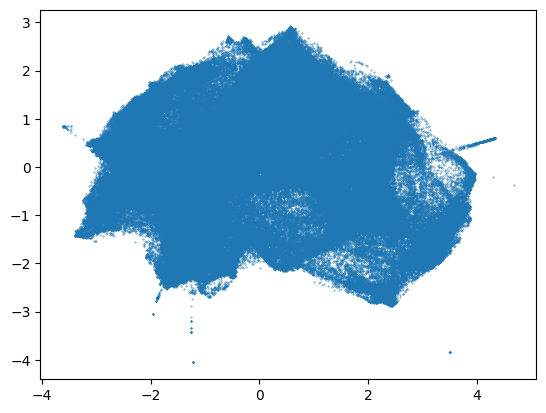

In [30]:
#Early Exagg
embedding_train_1 = embedding_train.optimize(n_iter=250, exaggeration=12, momentum=0.5)
plt.figure()
plt.scatter(embedding_train_1[:,0], embedding_train_1[:,1],s=0.1) 

===> Running optimization with exaggeration=1.00, lr=300000.00 for 2000 iterations...
Iteration   50, KL divergence 6.9696, 50 iterations in 6.5904 sec
Iteration  100, KL divergence 6.5296, 50 iterations in 6.6149 sec
Iteration  150, KL divergence 6.2758, 50 iterations in 6.9907 sec
Iteration  200, KL divergence 6.0978, 50 iterations in 7.6001 sec
Iteration  250, KL divergence 5.9608, 50 iterations in 7.5930 sec
Iteration  300, KL divergence 5.8501, 50 iterations in 8.0441 sec
Iteration  350, KL divergence 5.7571, 50 iterations in 8.1553 sec
Iteration  400, KL divergence 5.6770, 50 iterations in 8.6194 sec
Iteration  450, KL divergence 5.6068, 50 iterations in 8.6044 sec
Iteration  500, KL divergence 5.5443, 50 iterations in 9.1891 sec
Iteration  550, KL divergence 5.4879, 50 iterations in 9.2887 sec
Iteration  600, KL divergence 5.4369, 50 iterations in 9.5864 sec
Iteration  650, KL divergence 5.3901, 50 iterations in 10.1484 sec
Iteration  700, KL divergence 5.3468, 50 iterations in 

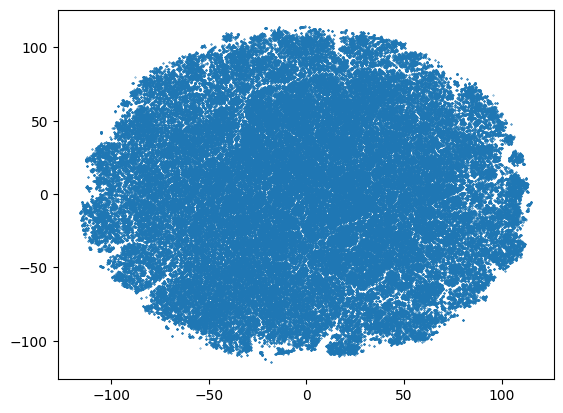

In [31]:
#Default/Traditional Behavior

embedding_train_2 = embedding_train_1.optimize(n_iter=2000, momentum=0.5)

plt.figure()
plt.scatter(embedding_train_2[:,0], embedding_train_2[:,1],s=0.1) 

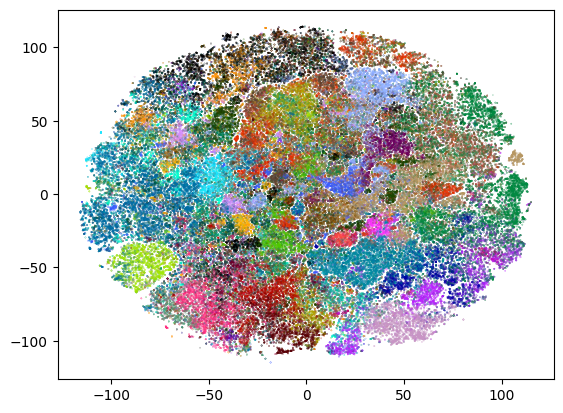

In [34]:
plt.figure()
plt.scatter(embedding_train_2[:,0], embedding_train_2[:,1],s=0.01, c=c_train) 

In [33]:
#with open('Emb_300k.npy','wb') as f:
#    np.save(f,y_umap)
#    np.save(f,y_umap_2)
#    np.save(f,y_umap_pca_6)
#    np.save(f,embedding_train_2)
#    np.save(f,idxs)